In [2]:
import sys
sys.path.append('..')

from src.models.advanced_models import AdvancedModels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("✓ Data loaded")

Training set: (238, 13)
Test set: (61, 13)
✓ Data loaded


In [3]:
# Initialize advanced models
advanced = AdvancedModels(random_state=42)

# Train all models (without optimization for speed)
advanced.train_all(X_train, y_train, optimize_xgb=False)

TRAINING ADVANCED MODELS

Training XGBoost...
✓ XGBoost trained

Training LightGBM...
✓ LightGBM trained

Training Neural Network...
✓ Neural Network trained


In [4]:
# Evaluate all advanced models
results = advanced.evaluate_all(X_test, y_test)


EVALUATING ADVANCED MODELS

XGBoost:
  accuracy: 0.8197
  precision: 0.7576
  recall: 0.8929
  f1_score: 0.8197
  roc_auc: 0.9048

LightGBM:
  accuracy: 0.8689
  precision: 0.8125
  recall: 0.9286
  f1_score: 0.8667
  roc_auc: 0.9459

Neural Network:
  accuracy: 0.7049
  precision: 0.7083
  recall: 0.6071
  f1_score: 0.6538
  roc_auc: 0.7543


In [5]:
# Create results dataframe and compare with baseline
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + "="*70)
print("ADVANCED MODELS COMPARISON")
print("="*70)
print(results_df)

# Find best advanced model
best_model = results_df['roc_auc'].idxmax()
print(f"\n🏆 Best Advanced Model: {best_model}")
print(f"   Accuracy: {results_df.loc[best_model, 'accuracy']:.4f}")
print(f"   ROC-AUC: {results_df.loc[best_model, 'roc_auc']:.4f}")


ADVANCED MODELS COMPARISON
                accuracy  precision  recall  f1_score  roc_auc
XGBoost           0.8197     0.7576  0.8929    0.8197   0.9048
LightGBM          0.8689     0.8125  0.9286    0.8667   0.9459
Neural Network    0.7049     0.7083  0.6071    0.6538   0.7543

🏆 Best Advanced Model: LightGBM
   Accuracy: 0.8689
   ROC-AUC: 0.9459


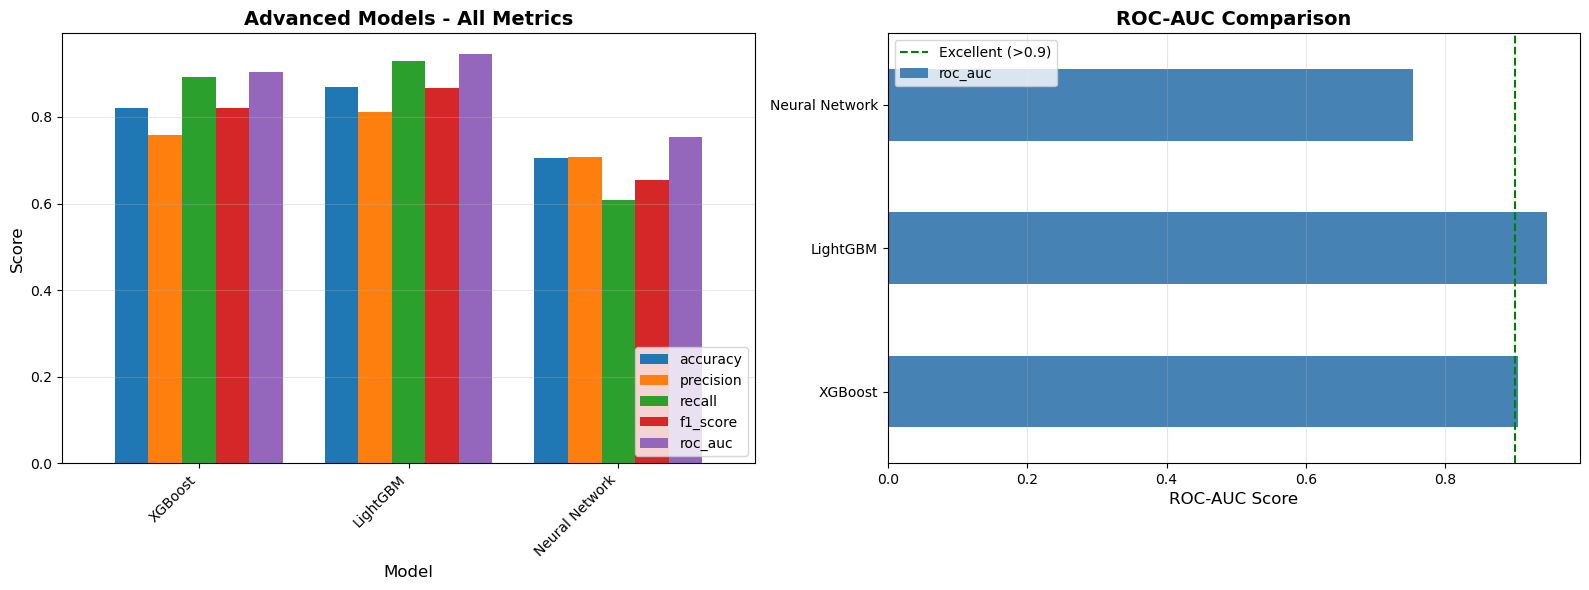

In [6]:
# Visualize advanced models performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All metrics
results_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Advanced Models - All Metrics', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: ROC-AUC comparison
results_df['roc_auc'].plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[1].axvline(x=0.9, color='green', linestyle='--', label='Excellent (>0.9)')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Save advanced models
advanced.save_models(filepath='../results/models/advanced_models.pkl')

print("\n✓ All advanced models completed and saved!")


✓ Advanced models saved to ../results/models/advanced_models.pkl

✓ All advanced models completed and saved!
